In [380]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Webscrapping 

In [347]:
base_url = "https://www.jumia.ug/mlp-electronics-appliances/?page={page_number}"

In [348]:
 headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}

In [349]:
all_products =[]

In [350]:
for page_number in range(1, 20):   
  
    url = base_url.format(page_number=page_number) 
    print(url)  

https://www.jumia.ug/mlp-electronics-appliances/?page=1
https://www.jumia.ug/mlp-electronics-appliances/?page=2
https://www.jumia.ug/mlp-electronics-appliances/?page=3
https://www.jumia.ug/mlp-electronics-appliances/?page=4
https://www.jumia.ug/mlp-electronics-appliances/?page=5
https://www.jumia.ug/mlp-electronics-appliances/?page=6
https://www.jumia.ug/mlp-electronics-appliances/?page=7
https://www.jumia.ug/mlp-electronics-appliances/?page=8
https://www.jumia.ug/mlp-electronics-appliances/?page=9
https://www.jumia.ug/mlp-electronics-appliances/?page=10
https://www.jumia.ug/mlp-electronics-appliances/?page=11
https://www.jumia.ug/mlp-electronics-appliances/?page=12
https://www.jumia.ug/mlp-electronics-appliances/?page=13
https://www.jumia.ug/mlp-electronics-appliances/?page=14
https://www.jumia.ug/mlp-electronics-appliances/?page=15
https://www.jumia.ug/mlp-electronics-appliances/?page=16
https://www.jumia.ug/mlp-electronics-appliances/?page=17
https://www.jumia.ug/mlp-electronics-app

In [351]:
response = requests.get(url,headers=headers)
content = response.content

In [352]:
soup = BeautifulSoup(content, 'html.parser')

In [353]:
#Extract the product information needed
items = soup.find_all('div', {'class': 'info'})
    

for item in items:
    title = item.find('h3', {'class': 'name'}).text.strip()
    
    selling_price = item.find('div', {'class': 'prc'}).text.replace('UGX','').replace(',','').strip()
    original_price = item.find('div', {'class': 'old'})
    if original_price:
        original_price = original_price.text.replace('+','').replace('UGX','').replace(',','').strip()
    else:
        original_price = 0.0
    rating = item.find('div', {'class':'stars _s'})
    if rating:
        rating = rating.text.strip()
    else:
        rating = ''
    #link = item.find('a', {'class': 's-item__link'})['href']
    all_products.append([title, selling_price, original_price,  rating ])
    
electronics = pd.DataFrame(all_products, columns=['Title', 'Selling_Price', 'Original_Price','Rating'])
print(electronics.head())

                                               Title Selling_Price  \
0   5*6 High Density Smart Mattress - Color May Vary        450000   
1  Men's Jackets Coats Denim Lightweight Slim Cas...         72200   
2  DELL Latitude Laptop  8gb Ram 500GB HDD (Intel...        485000   
3  Men's Oxfords Formal Flat Business Loafers Ita...         73157   
4                 Silkee Silkee Jumbo Tissue 10 Pack         18500   

  Original_Price        Rating  
0         459432    4 out of 5  
1          80000  3.7 out of 5  
2         889988  4.3 out of 5  
3         141906    4 out of 5  
4          20200  4.6 out of 5  


In [354]:
#Display the first 10 rows of the Business Inteligence(BI) books

electronics.head(10)

,Title,Selling_Price,Original_Price,Rating
0,5*6 High Density Smart Mattress - Color May Vary,450000,459432,4 out of 5
1,Men's Jackets Coats Denim Lightweight Slim Cas...,72200,80000,3.7 out of 5
2,DELL Latitude Laptop 8gb Ram 500GB HDD (Intel...,485000,889988,4.3 out of 5
3,Men's Oxfords Formal Flat Business Loafers Ita...,73157,141906,4 out of 5
4,Silkee Silkee Jumbo Tissue 10 Pack,18500,20200,4.6 out of 5
5,One Piece Women Close Fitting Clothes Sexy V-n...,11172,21906,5 out of 5
6,Set Of 3 Sievers Stainless Steel Small - Silver,13000,15998,3.9 out of 5
7,Magic Detergent - 5Kg,25300,27600,4.4 out of 5
8,Berrykey Mens Vintage Hawaii Beach Shirt Casu...,31800,41000,3.6 out of 5
9,Elastic Waist Men Trousers Drawstring Ankle-ba...,26167,29000,4 out of 5


In [355]:
electronics.tail(10)

,Title,Selling_Price,Original_Price,Rating
30,Mukwano Fortified Maize Flour -5kg,10400,14600,4.3 out of 5
31,Fortune Spaghetti 250 gms,1800,2000,4.3 out of 5
32,Berrykey Mens Trousers Casual Trendy Sport Pan...,25900,42010,3.9 out of 5
33,"Tecno Spark 30C 6.67"" 4GB RAM 128GB ROM 50MP 5...",436720,600000,4 out of 5
34,Women's Plain Black Bikers - Black,7600,15000,4.2 out of 5
35,Machislet High Quality Elegant Clothes Printed...,25124,46094,3.4 out of 5
36,Lanzo Vanilla Raspberry 200gm 6PACK,13500,15600,4.3 out of 5
37,Berrykey Mens Lightweight Coats Blazer Jackets...,83600,135980,4.1 out of 5
38,Hoffmans 2 Slice Electric Bread Toaster - Silv...,41000,70000,4.1 out of 5
39,"Sollatek TV Wall mount 14"" to 42""-Black+TV Guard",29500,40014,4.1 out of 5


In [356]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           40 non-null     object
 1   Selling_Price   40 non-null     object
 2   Original_Price  40 non-null     object
 3   Rating          40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


Convert columns to numeric 

In [357]:
electronics['Selling_Price'] = pd.to_numeric(electronics['Selling_Price'], errors='coerce')
electronics['Original_Price'] = pd.to_numeric(electronics['Original_Price'], errors='coerce')

split rating column

In [358]:
electronics[['rating_part_1', 'rating_part_2', 'rating_part_3', 'rating_part_4']] = electronics['Rating'].str.split(' ', expand=True)

In [359]:
# Split by space and expand into new columns directly in the dataframe
#df_split = electronics['Rating'].str.split(' ', expand=True)

# Dynamically create column names based on the maximum number of splits in the data
#df_split.columns = [f'rating_part_{i+1}' for i in range(df_split.shape[1])]

# Now assign the split columns back to the original dataframe
#electronics = pd.concat([electronics, df_split], axis=1)

# Check the result
#print(electronics)


In [360]:
electronics 

,Title,Selling_Price,Original_Price,Rating,rating_part_1,rating_part_2,rating_part_3,rating_part_4
0,5*6 High Density Smart Mattress - Color May Vary,450000.0,459432.0,4 out of 5,4,out,of,5
1,Men's Jackets Coats Denim Lightweight Slim Cas...,72200.0,80000.0,3.7 out of 5,3.7,out,of,5
2,DELL Latitude Laptop 8gb Ram 500GB HDD (Intel...,485000.0,889988.0,4.3 out of 5,4.3,out,of,5
3,Men's Oxfords Formal Flat Business Loafers Ita...,73157.0,141906.0,4 out of 5,4,out,of,5
4,Silkee Silkee Jumbo Tissue 10 Pack,18500.0,20200.0,4.6 out of 5,4.6,out,of,5
5,One Piece Women Close Fitting Clothes Sexy V-n...,11172.0,21906.0,5 out of 5,5,out,of,5
6,Set Of 3 Sievers Stainless Steel Small - Silver,13000.0,15998.0,3.9 out of 5,3.9,out,of,5
7,Magic Detergent - 5Kg,25300.0,27600.0,4.4 out of 5,4.4,out,of,5
8,Berrykey Mens Vintage Hawaii Beach Shirt Casu...,31800.0,41000.0,3.6 out of 5,3.6,out,of,5
9,Elastic Waist Men Trousers Drawstring Ankle-ba...,26167.0,29000.0,4 out of 5,4,out,of,5


In [361]:
electronics.columns

Index(['Title', 'Selling_Price', 'Original_Price', 'Rating', 'rating_part_1',
       'rating_part_2', 'rating_part_3', 'rating_part_4'],
      dtype='object')

In [362]:
electronics = electronics.drop(['Rating','rating_part_2', 'rating_part_3', 'rating_part_4'], axis=1)

In [363]:
electronics 

,Title,Selling_Price,Original_Price,rating_part_1
0,5*6 High Density Smart Mattress - Color May Vary,450000.0,459432.0,4
1,Men's Jackets Coats Denim Lightweight Slim Cas...,72200.0,80000.0,3.7
2,DELL Latitude Laptop 8gb Ram 500GB HDD (Intel...,485000.0,889988.0,4.3
3,Men's Oxfords Formal Flat Business Loafers Ita...,73157.0,141906.0,4
4,Silkee Silkee Jumbo Tissue 10 Pack,18500.0,20200.0,4.6
5,One Piece Women Close Fitting Clothes Sexy V-n...,11172.0,21906.0,5
6,Set Of 3 Sievers Stainless Steel Small - Silver,13000.0,15998.0,3.9
7,Magic Detergent - 5Kg,25300.0,27600.0,4.4
8,Berrykey Mens Vintage Hawaii Beach Shirt Casu...,31800.0,41000.0,3.6
9,Elastic Waist Men Trousers Drawstring Ankle-ba...,26167.0,29000.0,4


In [364]:
electronics = electronics.rename(columns={'rating_part_1': 'Rating'})

In [365]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           40 non-null     object 
 1   Selling_Price   39 non-null     float64
 2   Original_Price  39 non-null     float64
 3   Rating          40 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


In [366]:
electronics['Rating'] = electronics['Rating'].astype(float)

In [367]:
electronics.head(5)

,Title,Selling_Price,Original_Price,Rating
0,5*6 High Density Smart Mattress - Color May Vary,450000.0,459432.0,4.0
1,Men's Jackets Coats Denim Lightweight Slim Cas...,72200.0,80000.0,3.7
2,DELL Latitude Laptop 8gb Ram 500GB HDD (Intel...,485000.0,889988.0,4.3
3,Men's Oxfords Formal Flat Business Loafers Ita...,73157.0,141906.0,4.0
4,Silkee Silkee Jumbo Tissue 10 Pack,18500.0,20200.0,4.6


In [368]:
electronics = electronics.drop(['Title'], axis=1)

In [369]:
# save the dataframe to csv
electronics.to_csv('jumia_electronics.csv', index=False)

## Data Analysis 

In [370]:
electronics.describe()

,Selling_Price,Original_Price,Rating
count,39.000000,3.900000e+01,40.000000
mean,90528.000000,1.535518e+05,4.007500
std,182519.522661,3.371079e+05,0.447436
min,1800.000000,2.000000e+03,3.000000
25%,14871.000000,2.105300e+04,3.700000
50%,26167.000000,4.584100e+04,4.050000
75%,59800.000000,9.970800e+04,4.300000
max,935000.000000,1.900000e+06,5.000000


In [371]:
electronics = electronics.sort_values(by='Rating', ascending=True)
electronics.head(5)

,Selling_Price,Original_Price,Rating
26,16929.0,19000.0,3.0
14,29990.0,34990.0,3.1
18,62700.0,105416.0,3.4
35,25124.0,46094.0,3.4
24,935000.0,1900000.0,3.4


In [372]:
electronics.columns

Index(['Selling_Price', 'Original_Price', 'Rating'], dtype='object')

In [373]:
electronics['discount'] = electronics['Original_Price'] - electronics['Selling_Price']
electronics

,Selling_Price,Original_Price,Rating,discount
26,16929.0,19000.0,3.0,2071.0
14,29990.0,34990.0,3.1,5000.0
18,62700.0,105416.0,3.4,42716.0
35,25124.0,46094.0,3.4,20970.0
24,935000.0,1900000.0,3.4,965000.0
13,45500.0,94000.0,3.5,48500.0
29,4550.0,8922.0,3.5,4372.0
8,31800.0,41000.0,3.6,9200.0
25,NaN,NaN,3.7,NaN
20,31999.0,77437.0,3.7,45438.0


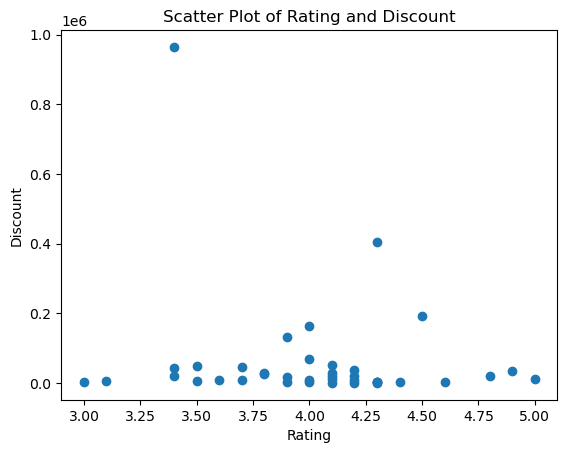

In [ ]:
x =electronics['Rating']
y=electronics['discount']
plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Discount')
plt.title('Scatter Plot of Rating and Discount')

# Show the plot
plt.show()

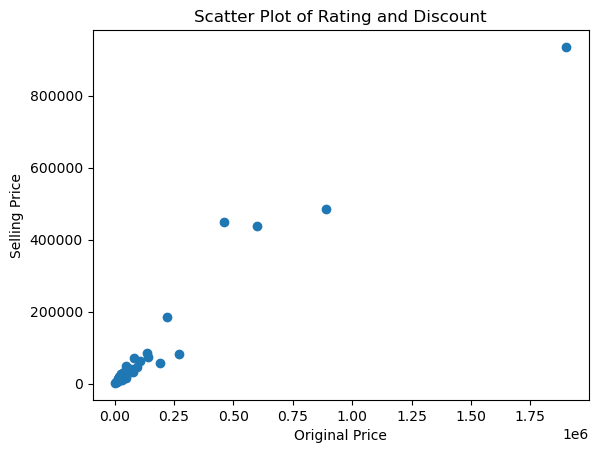

In [ ]:
x =electronics['Original_Price']
y=electronics['Selling_Price']
plt.scatter(x, y)
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price and Origina ')

# Show the plot
plt.show()

In [382]:
electronics.columns

Index(['Selling_Price', 'Original_Price', 'Rating', 'discount'], dtype='object')

In [385]:
rating_grouping = electronics.groupby('Rating')[['Selling_Price', 'Original_Price', 'discount']].mean().reset_index()
rating_grouping

,Rating,Selling_Price,Original_Price,discount
0,3.0,16929.000000,19000.000000,2071.000000
1,3.1,29990.000000,34990.000000,5000.000000
2,3.4,340941.333333,683836.666667,342895.333333
3,3.5,25025.000000,51461.000000,26436.000000
4,3.6,31800.000000,41000.000000,9200.000000
5,3.7,52099.500000,78718.500000,26619.000000
6,3.8,21071.000000,48439.000000,27368.000000
7,3.9,31933.333333,82340.666667,50407.333333
8,4.0,246511.000000,307584.500000,61073.500000
9,4.1,36602.600000,59247.000000,22644.400000


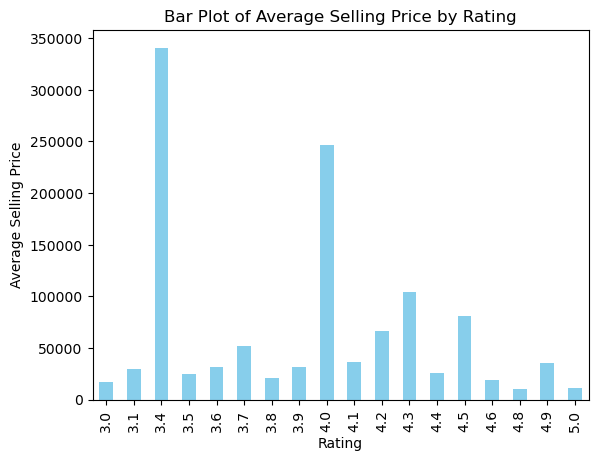

In [386]:
rating_avg = electronics.groupby('Rating')['Selling_Price'].mean()

# Plot the bar plot
rating_avg.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Selling Price')
plt.title('Bar Plot of Average Selling Price by Rating')
plt.show()

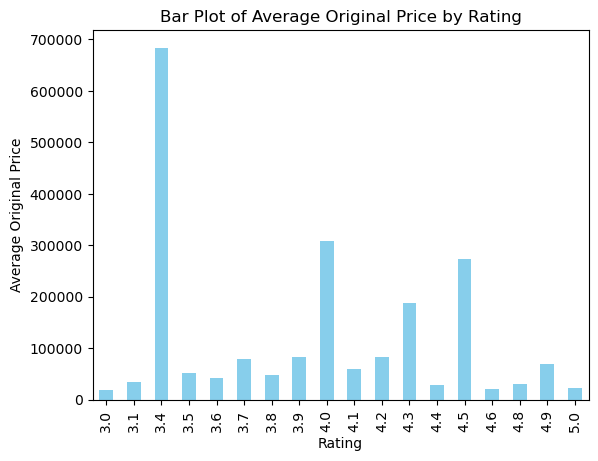

In [391]:
rating_avg2 = electronics.groupby('Rating')['Original_Price'].mean()

# Plot the bar plot
rating_avg2.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Original Price')
plt.title('Bar Plot of Average Original Price by Rating')
plt.show()

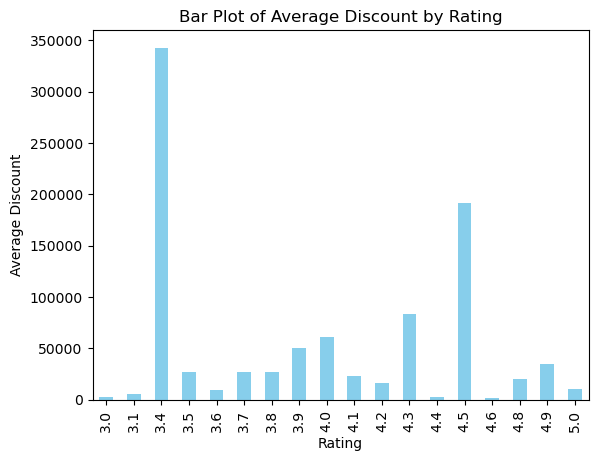

In [390]:
rating_avg3 = electronics.groupby('Rating')['discount'].mean()

# Plot the bar plot
rating_avg3.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Discount')
plt.title('Bar Plot of Average Discount by Rating')
plt.show()